# Naive Bayes

Naïve Bayes adalah algoritma `classification` yang didasarkan pada prinsip **probabilitas** dan **Teorema Bayes**, menyatakan bahwa peluang suatu hipotesis dapat dihitung dari peluang data, asalkan setiap fitur dianggap ***independent***. Algoritma ini menghitung **probabilitas** _a priori_ dari setiap kelas dan mengalikannya dengan **probabilitas** kondisi setiap fitur muncul dalam data, menghasilkan **probabilitas** _posterior_. Meskipun asumsi independensi antar fitur sering kali tidak sepenuhnya realistis di dunia nyata, Naïve Bayes tetap efektif dan efisien, terutama untuk masalah dengan data berukuran besar dan dimensi tinggi seperti pengolahan bahasa alami, deteksi spam, dan diagnosis medis. Pendekatan ini juga mencakup varian-varian seperti **Gaussian Naïve** Bayes untuk data kontinu, serta _Multinomial_ dan _Bernoulli_ Naïve Bayes untuk data teks dan biner, di mana teknik seperti `Laplace smoothing` digunakan untuk mengatasi masalah **probabilitas** nol. Secara keseluruhan, Naïve Bayes menawarkan metode sederhana namun kuat untuk `classification`, memanfaatkan teori **probabilitas** untuk memberikan prediksi yang cepat dan andal dalam berbagai aplikasi data mining.

## Teorema Bayes

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

- $ P(A|B) $: Probabilitas hipotesis $ A $ terjadi jika evidence $ B $ teramati (*posterior*).
- $ P(B|A) $: Probabilitas evidence $ B $ muncul jika hipotesis $ A $ benar (*likelihood*).
- $ P(A) $: Probabilitas awal hipotesis $ A $ (*prior*).
- $ P(B) $: Probabilitas evidence $ B $ (*evidence*).

Dalam klasifikasi Naïve Bayes, kita ingin mencari probabilitas kelas $ C $ dari suatu sampel dengan fitur $ X_1, X_2, ..., X_n $:

$$
P(C|X_1, X_2, ..., X_n) = \frac{P(X_1, X_2, ..., X_n|C) P(C)}{P(X_1, X_2, ..., X_n)}
$$

Karena asumsi independensi antar fitur, maka:

$$
P(X_1, X_2, ..., X_n|C) = P(X_1|C) P(X_2|C) ... P(X_n|C)
$$

Sehingga rumus Naïve Bayes menjadi:

$$
P(C|X_1, X_2, ..., X_n) \propto P(C) \prod_{i=1}^{n} P(X_i|C)
$$

### Asumsi Independensi
Naive Bayes mengasumsikan semua fitur ($ x_1, x_2, ..., x_n $) independen terhadap satu lain jika kelas ($ y $) diketahui:

$$
P(x_1, x_2, ..., x_n | y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)
$$

Asumsi ini menyederhanakan perhitungan, tetapi bisa mengurangi akurasi jika fitur saling berkorelasi.

### Training
1. Hitung prior probability untuk setiap kelas:

  $$
  P(y) = \frac{\text{Jumlah sampel kelas } y}{\text{Total sampel}}
  $$

2. Hitung likelihood setiap fitur berdasarkan kelas:
  - Untuk Gaussian: Hitung mean ($ \mu $) dan deviasi standar ($ \sigma $) fitur.
  - Untuk Multinomial/Bernoulli: Hitung probabilitas fitur $ x_i $ pada kelas $ y $:

    $$
    P(x_i|y) = \frac{\text{Frekuensi } x_i \text{ di kelas } y + \alpha}{\text{Total fitur di kelas } y + \alpha \cdot n}
    $$

  ($ \alpha $ = Laplace smoothing untuk menghindari probabilitas nol).

### Prediction
Untuk sampel baru ($ x_1, x_2, ..., x_n $), pilih kelas $ y $ dengan nilai posterior tertinggi:

$$
y = \arg\max_{y} \left( P(y) \cdot \prod_{i=1}^n P(x_i|y) \right)
$$

### Advantages & Disadvantages
| Kelebihan                              | Disadvantages                                              |
|----------------------------------------|------------------------------------------------------------|
| Cepat dan efisien untuk dataset besar. | Asumsi independensi fitur sering tidak valid.              |
| Handal pada data dimensi tinggi.       | Sensitif terhadap data tidak seimbang (*class imbalance*). |
| Cocok untuk klasifikasi teks.          | Tidak bisa menangani fitur yang saling bergantung.         |

## Types of Naïve Bayes
Terdapat beberapa varian utama dari Naïve Bayes, tergantung pada tipe data fitur yang digunakan:

### Gaussian Naïve Bayes (GNB)
- Digunakan ketika fitur berupa data kontinu dan diasumsikan mengikuti distribusi normal (Gaussian).
- Probabilitas dihitung menggunakan fungsi distribusi normal:

  $$
  P(X_i|C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} e^{-\frac{(X_i - \mu_C)^2}{2\sigma_C^2}}
  $$

di mana $ \mu_C $ dan $ \sigma_C^2 $ adalah rata-rata dan varians fitur $ X_i $ dalam kelas $ C $.

### Multinomial Naïve Bayes
- Cocok untuk data kategori dengan distribusi multinomial.
- Sering digunakan dalam text classification seperti spam detection.
- Probabilitas dihitung berdasarkan frekuensi kata dalam dokumen.

### Bernoulli Naïve Bayes
- Digunakan untuk data biner (0/1), misalnya kehadiran atau ketidakhadiran kata dalam dokumen.
- Probabilitas dihitung berdasarkan kehadiran fitur dalam kelas tertentu.

In [26]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

## Get Cleaned Data

In [27]:
data = pd.read_csv("iris_cleaned.csv")
# Hapus kolom 'id' (tidak diperlukan untuk pemodelan)
data = data.drop('id', axis=1)
print("5 Baris Pertama Data:")
print(data.head())

5 Baris Pertama Data:
         class  petal length  petal width  sepal length  sepal width
0  Iris-setosa           1.4          0.2           4.9          3.0
1  Iris-setosa           1.3          0.2           4.8          3.2
2  Iris-setosa           1.5          0.2           4.6          3.1
3  Iris-setosa           1.4          0.2           5.0          3.6
4  Iris-setosa           1.7          0.4           5.4          3.9


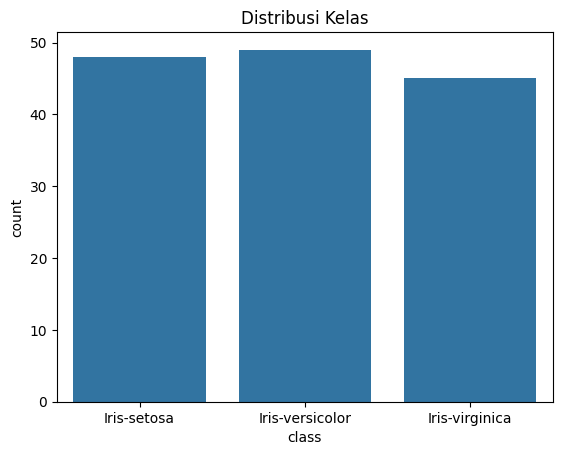

In [28]:
# Visualisasi Distribusi Kelas
sns.countplot(x='class', data=data)  # Gunakan kolom 'class'
plt.title("Distribusi Kelas")
plt.show()

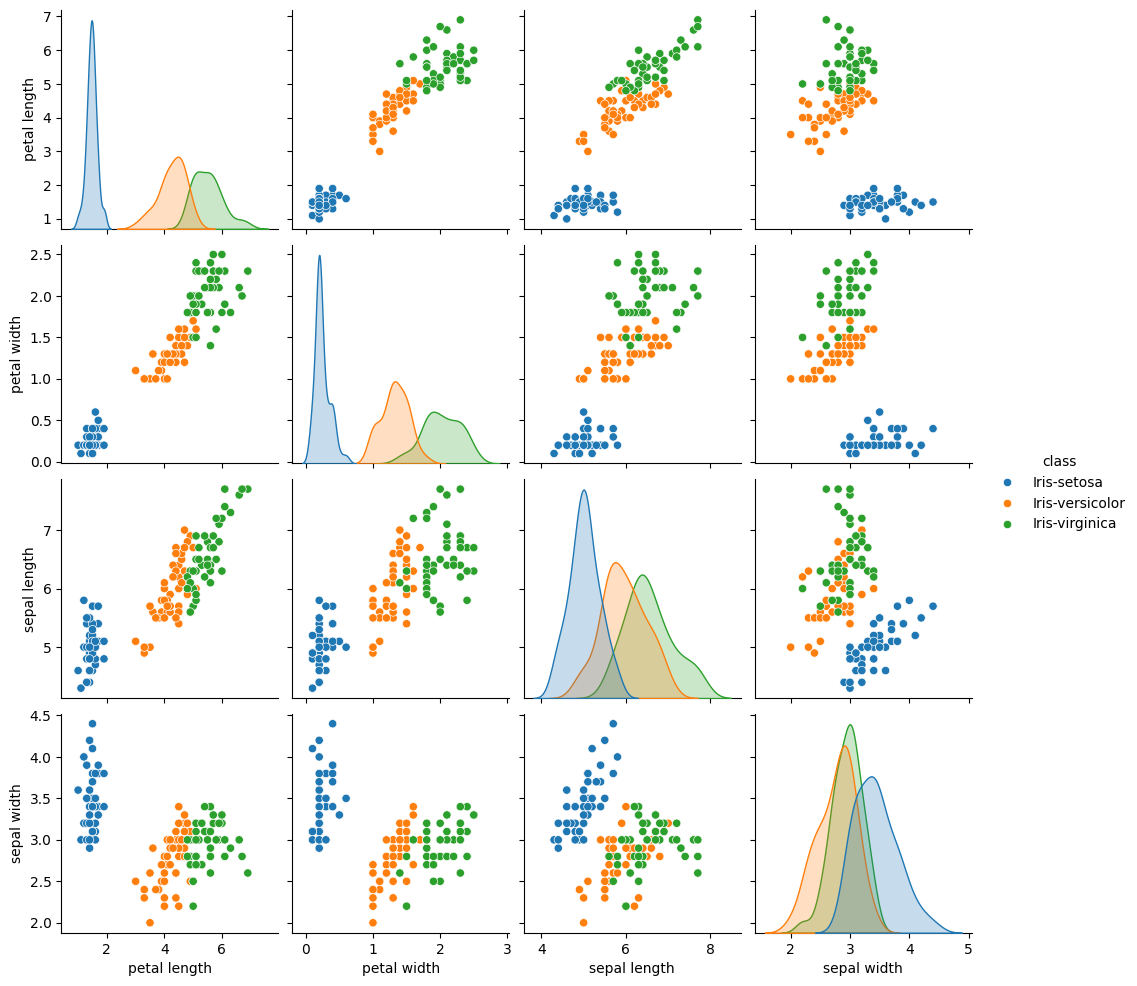

In [29]:
# Visualisasi Pairplot
sns.pairplot(data, hue='class')  # Gunakan kolom 'class'
plt.show()

In [30]:
# Pisahkan fitur (X) dan target (y)
X = data.drop('class', axis=1)
y = data['class']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Independence Assumption

$$
P(x_1, x_2, ..., x_n | y) = P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y)
$$

**Implementasi dalam Kode**:
- Asumsi ini "tertanam" dalam algoritma `GaussianNB()` di `scikit-learn`.
- Perkalian likelihood dilakukan otomatis saat prediksi:
  ```python
  posterior = prior * (likelihood_feature1 * likelihood_feature2 * ...)
  ```

In [31]:
model = GaussianNB()

### Predictions

$$
y = \arg\max_{y} \left( P(y) \cdot \prod_{i=1}^n P(x_i|y) \right)
$$

Implementasi dalam Kode:
- `model.predict()` melakukan perhitungan ini untuk setiap sampel di `X_test`.
- Hasil prediksi disimpan di `y_pred`.

### Teorema Bayes

$$
P(y|x) = \frac{P(x|y) \cdot P(y)}{P(x)}
$$

Implementasi dalam Kode:
- `model.fit(X_train, y_train)` menghitung $P(y)$ (**prior**) dan $P(x|y)$ (**likelihood**).
- `model.predict(X_test)` menghitung $P(y|x)$ (**posterior**) untuk setiap kelas dan memilih kelas dengan posterior tertinggi.
- **Evidence ($P(x)$)** tidak dihitung langsung karena pada klasifikasi, $P(x)$ konstan untuk semua kelas, cukup membandingkan pembilang ($P(x|y) \cdot P(y)$).

In [32]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Prior Probability ($P(y)$)

$$
P(y) = \frac{\text{Jumlah sampel kelas } y}{\text{Total sampel}}
$$

Implementasi dalam Kode:
- Prior probability dihitung saat `model.fit()` dan disimpan di `model.class_prior_`.

In [33]:
print("Prior Probability:", model.class_prior_)

Prior Probability: [0.34513274 0.32743363 0.32743363]


### Likelihood ($P(x|y)$)
Rumus (Gaussian Naive Bayes):

$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

Implementasi dalam Kode:
- Mean ($\mu_y$) dan Varians ($\sigma_y^2$) dihitung saat `model.fit()` dan disimpan di:
  - `model.theta_` (mean)
  - `model.var_` (variance)

In [35]:
print("Mean (μ):", model.theta_)
print("Variance (σ²):", model.var_)

Mean (μ): [[1.46923077 0.25128205 5.01025641 3.44102564]
 [4.28108108 1.34054054 5.98918919 2.82162162]
 [5.51891892 2.04054054 6.55675676 2.95945946]]
Variance (σ²): [[0.03033531 0.01224195 0.11579225 0.12754767]
 [0.22585829 0.04024836 0.24420745 0.09899197]
 [0.23504748 0.07484295 0.28353543 0.05484295]]


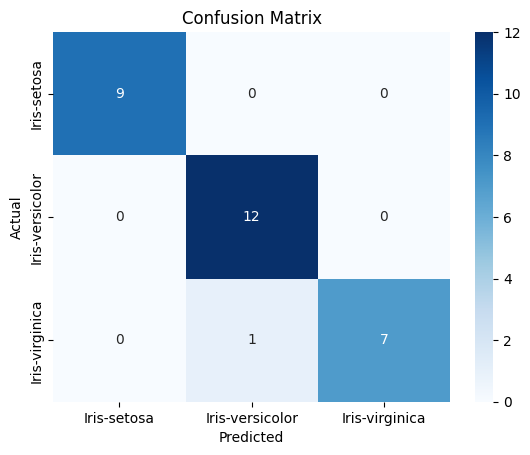

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.96        29
   weighted avg       0.97      0.97      0.97        29



In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))